<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score


y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions);

SyntaxError: ignored

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
data = pd.read_csv('./train.csv')
data_test = pd.read_csv('./test.csv')
data.head(10); #смотрим данные

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data.shape #начинаем собирать информацию о данных (количество столбцов и строк)

(5282, 20)

In [ ]:
data.isnull().sum()#нет Nan-oв

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [ ]:
data.info() #типы столбцов 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
data['TotalSpent'].value_counts() #видим, что есть 9 шт пробела ' '

20.2       9
           9
19.75      8
20.05      6
19.65      6
          ..
3915.4     1
1544.05    1
156.85     1
2907.55    1
3835.55    1
Name: TotalSpent, Length: 4978, dtype: int64

In [ ]:
for d in [data, data_test]:  
    # d['TotalSpent'] = d['TotalSpent'].replace(' ', 0) #заменяем ' ' на 0
    d['TotalSpent'] = d['TotalSpent'].astype(float)  
    d['IsSeniorCitizen'] = d['IsSeniorCitizen'].astype(object)

In [ ]:
data.describe() #продолжаем анализировать данные

,ClientPeriod,MonthlySpending,TotalSpent,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2287.486161,0.262022
std,24.550326,30.176464,2269.049195,0.439776
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.462500,395.725000,0.000000
50%,29.000000,70.400000,1405.650000,0.000000
75%,55.000000,90.050000,3795.212500,1.000000
max,72.000000,118.750000,8684.800000,1.000000


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).


По заданию есть все виды графиков, учился и дедад по разному!


In [ ]:
df = pd.DataFrame(data) 
df1 = pd.DataFrame(data_test)
#for var in num_cols:
    #df[var].plot(color='red', kind='hist', bins=15)
    #plt.title(var)
    #plt.grid()
    #plt.show()



Churn: No, Churn: Yes для числовых признаков.


In [ ]:
import seaborn as sns
df_y = data[data['Churn']==1]
df_n = data[data['Churn']==0] 

def Distribution_num(x): #по разному учусь делать графики, записал в функцию
    sns.histplot(df_n[x],  kde=False, label='Churn: No', color = "blue")
    sns.histplot(df_y[x],  kde=False, label='Churn: Yes',  color= "red")
    plt.legend(prop={'size': 16})
    plt.title(x)
    plt.xlabel(x)
    plt.ylabel('Churn_count')

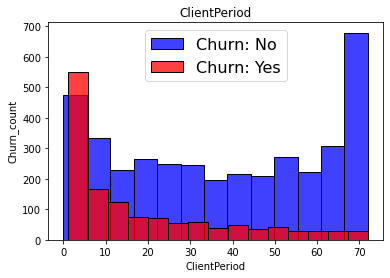

In [ ]:
Distribution_num('ClientPeriod')

Как мы видим со временем вользования услугами компании идёт отток клиентов.

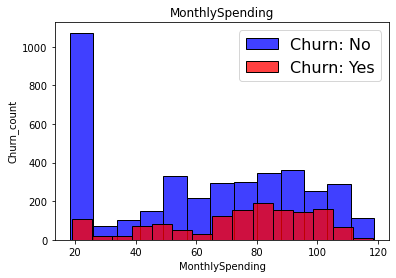

In [ ]:
Distribution_num('MonthlySpending')

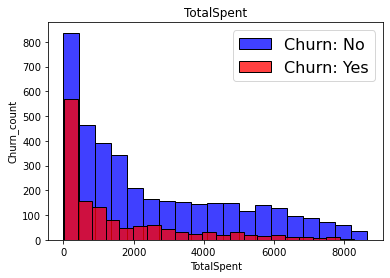

In [ ]:
Distribution_num('TotalSpent')


Churn: No, Churn: Yes для категориальных признаков.


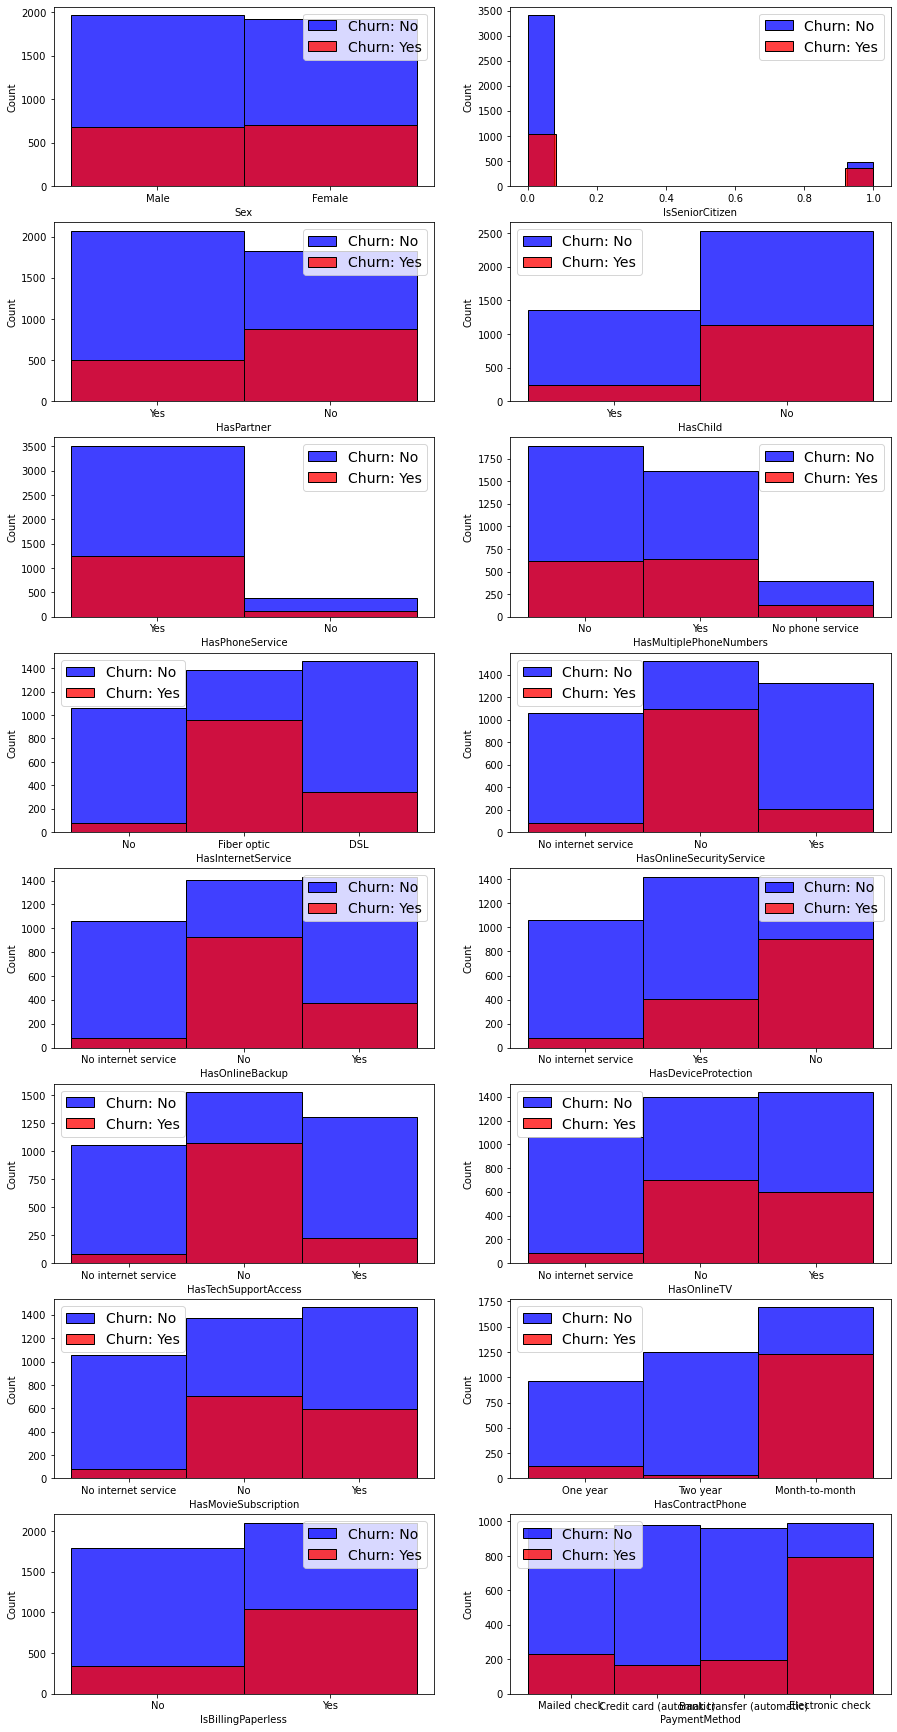

In [ ]:
plt.figure(figsize=(15, 35))
i=1
for var in cat_cols:
    plt.subplot(9, 2, i)
    sns.histplot(df_n[var],  kde=False, label='Churn: No', color = "blue")
    sns.histplot(df_y[var],  kde=False, label='Churn: Yes',  color= "red")
    plt.legend(prop={'size': 14})
    i+=1 

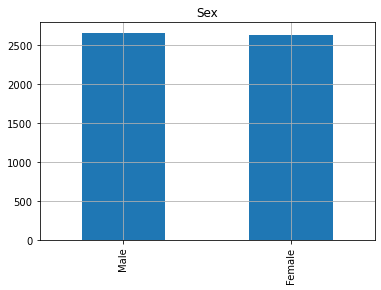

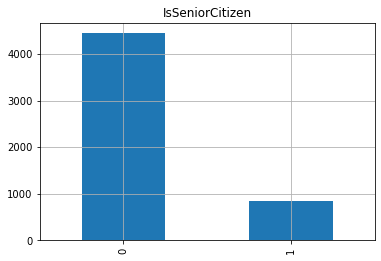

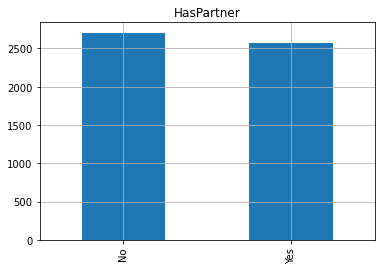

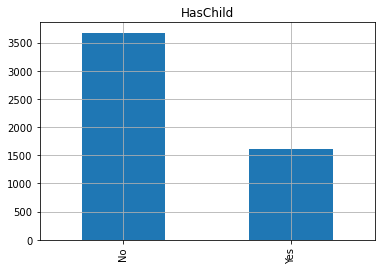

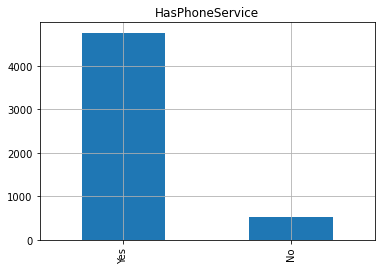

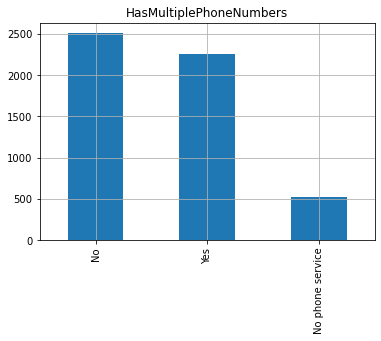

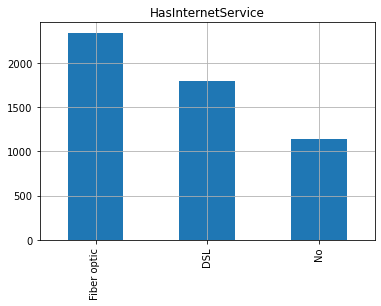

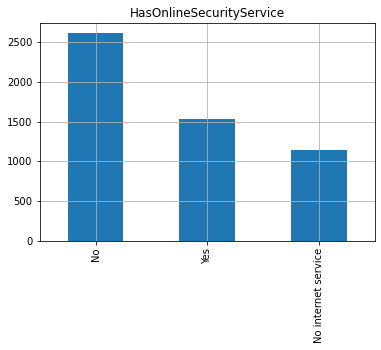

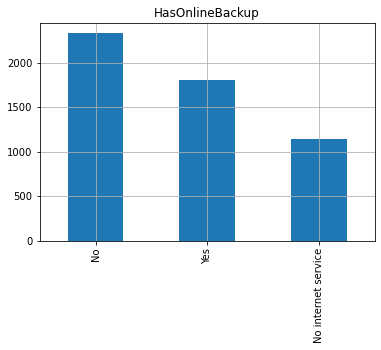

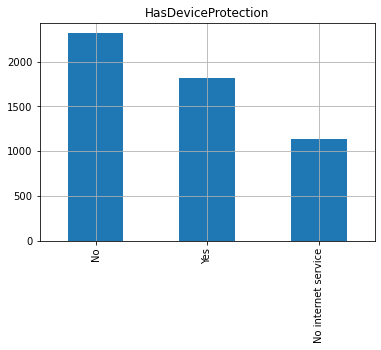

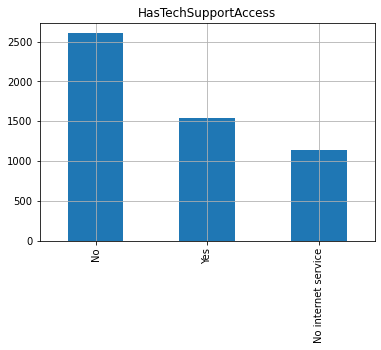

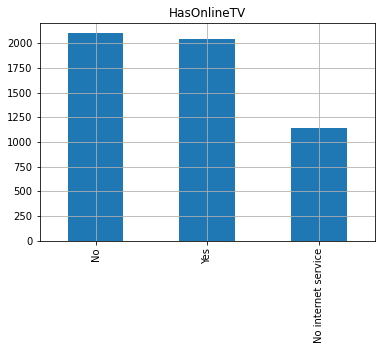

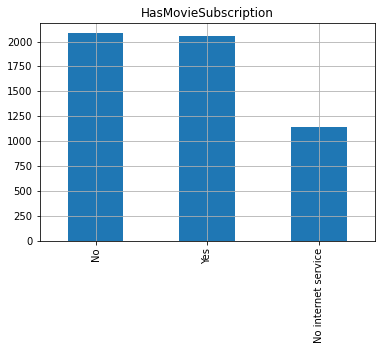

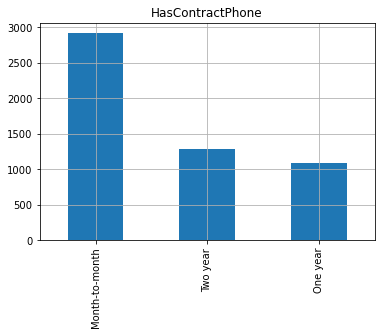

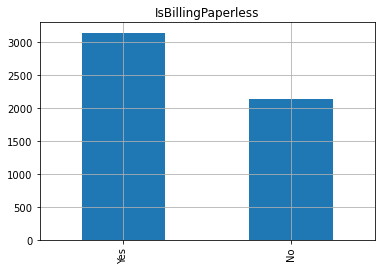

In [ ]:
for var in cat_cols[:-1]:
    df[var].value_counts().plot.bar()
    plt.title(var)
    plt.grid()
    plt.show()


Классы не являются сбалансированными т.к. значений класса 0 больше, чем значений класса 1.

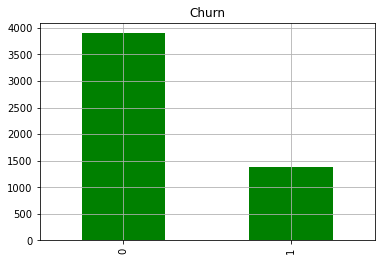

In [ ]:
df['Churn'].value_counts().plot(kind='bar', color='green') 
plt.title('Churn')
plt.grid()
plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.


<AxesSubplot:>

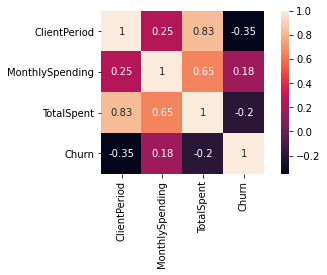

In [ ]:
corr_data = data
corr=data.corr()
plt.figure(figsize=(6, 3))
sns.heatmap(corr_data.corr(),vmax=1, square=True, annot=True)




## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
!pip3 install catboost

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier

In [ ]:
label_encoder = LabelEncoder() #категириальные признаки кодирую в 0, 1, 2
for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col])
    data_test[col]  = label_encoder.fit_transform(data_test[col])
    data_test[col]  = data_test[col].astype('category')
    data[col] = data[col].astype('category')

In [ ]:
dummy = pd.get_dummies(data[cat_cols]) #One-hot кодирование
X_dummy = pd.concat([data[num_cols], dummy], axis=1)
X_origin = data.iloc[:, :-1]
dummy_test = pd.get_dummies(data_test[cat_cols])
X_dummy_test = pd.concat([data_test[num_cols], dummy_test], axis=1)



In [ ]:
X = data[feature_cols] #признаки в переменную Х

In [ ]:
y = data[target_col]  #таргет в переменную у


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.25, random_state=42) #кроссвалидация

In [ ]:
scaler = StandardScaler() #нормируем

X_scaler = scaler.fit_transform(X_train)
X_scaler_test = scaler.transform(X_test)
X_scaler.shape


(3961, 46)

In [ ]:
logreg = LogisticRegression(random_state=42, max_iter=10000) #логистическая регрессия
logreg.fit(X_train, y_train)
print("Score: ", logreg.score(X_train, y_train))


Score:  0.8111587982832618


# Score:  0.8111587982832618 Kaggle 0.84234

In [ ]:
searchCV = LogisticRegressionCV(scoring='roc_auc', cv=5, random_state=42, max_iter=2000 #LogisticRegressionCV
                                , solver ='lbfgs', refit=True)
searchCV.fit(X_train, y_train)

print ('Max auc_roc:', searchCV.scores_[1].mean(axis=0).max())

Max auc_roc: 0.8491932061866094


In [ ]:
param_grid= {'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001]}  #параметр С

In [ ]:
pipe = make_pipeline(scaler, logreg)    #pipeline

In [ ]:
log_reg_cv = GridSearchCV(pipe,  param_grid, cv=8, scoring = 'roc_auc', refit=True)
log_reg_cv.fit(X, y)
print("Best parameters: ", log_reg_cv.best_params_)
print("Best score: ", log_reg_cv.best_score_)


Best parameters:  {'logisticregression__C': 10}
Best score:  0.8440017695222182



# Best_score:  0.854995656013149 Kaggle  0.84354


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
import catboost 
from sklearn.model_selection import train_test_split

X_train_origin, X_test_origin, _, _ = train_test_split(X_origin, y, 
                                                       train_size=0.75, 
                                                       random_state=42)
categorical_indices = np.arange(3, 19)
boosting_model = catboost.CatBoostClassifier(iterations=1500, learning_rate=0.01,
                                             cat_features=categorical_indices) #поэкспериментировал немножко 

boosting_model.fit(X_train_origin, y_train)


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [ ]:
best_model = boosting_model

In [ ]:
data = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(data_test)[:,-1] 
submission.to_csv('./my_submission.csv',index = False)




In [ ]:
#на Kaggle max Catboots 0.85133 Valery Yakukhin, далее с перебором новых параметров и созданию новых признаков набрал 0.85437

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.